In [30]:
library(ggplot2)
library(tidyr)

In [31]:
activity = read.csv("../_data/carp_activity.csv", header=TRUE, stringsAsFactors=FALSE)
head(activity, 3)

Date,Carpentry,Helper,Instructor,Organizer.Instructor,Organizer
2014-07-24,Data,1,0,0,0
2014-09-29,Data,0,1,0,0
2015-04-02,Software,0,1,0,0


In [32]:
#activity$helper_cs = cumsum(activity$helper)
#activity$instructor_cs = cumsum(activity$instructor)
#activity$org_inst_cs = cumsum(activity$org_inst)
#activity$organizer_cs = cumsum(activity$organizer)

In [33]:
cumulative_activity = data.frame(Date=as.Date(activity$Date), 
                                Type=activity$Carpentry, 
                                Helper=cumsum(activity$Helper),
                                Instructor=cumsum(activity$Instructor),
                                Organizer_Instructor=cumsum(activity$Organizer.Instructor),
                                Organizer=cumsum(activity$Organizer)
                                )
head(cumulative_activity, 2)

Date,Type,Helper,Instructor,Organizer_Instructor,Organizer
2014-07-24,Data,1,0,0,0
2014-09-29,Data,1,1,0,0


In [38]:
activity_long = gather(cumulative_activity, Role, Total, Helper:Organizer)
tail(activity_long, 25)

,Date,Type,Role,Total
48,2017-05-22,Instructor,Organizer_Instructor,3
49,2017-05-25,Software,Organizer_Instructor,4
50,2017-06-29,Data,Organizer_Instructor,4
51,2017-08-14,Software,Organizer_Instructor,5
52,2017-08-15,Data,Organizer_Instructor,5
53,2017-09-30,Data,Organizer_Instructor,6
54,2017-10-30,Data,Organizer_Instructor,7
55,2014-07-24,Data,Organizer,0
56,2014-09-29,Data,Organizer,0
57,2015-04-02,Software,Organizer,0


In [35]:
str(cumulative_activity)

'data.frame':	18 obs. of  6 variables:
 $ Date                : Date, format: "2014-07-24" "2014-09-29" ...
 $ Type                : Factor w/ 3 levels "Data","Instructor",..: 1 1 3 3 1 2 3 3 1 3 ...
 $ Helper              : int  1 1 1 1 1 2 2 2 2 2 ...
 $ Instructor          : int  0 1 2 3 4 4 4 4 4 5 ...
 $ Organizer_Instructor: int  0 0 0 0 0 0 1 2 2 2 ...
 $ Organizer           : int  0 0 0 0 0 0 0 0 1 1 ...


In [36]:
str(activity_long)

'data.frame':	72 obs. of  4 variables:
 $ Date : Date, format: "2014-07-24" "2014-09-29" ...
 $ Type : Factor w/ 3 levels "Data","Instructor",..: 1 1 3 3 1 2 3 3 1 3 ...
 $ Role : chr  "Helper" "Helper" "Helper" "Helper" ...
 $ Total: int  1 1 1 1 1 2 2 2 2 2 ...


In [43]:
activity_long$Role <- factor(activity_long$Role, 
                             levels=c("Organizer", "Organizer_Instructor",
                                      "Instructor", "Helper"))
tail(order(activity_long))

[1] 133 134 136 137 139 141

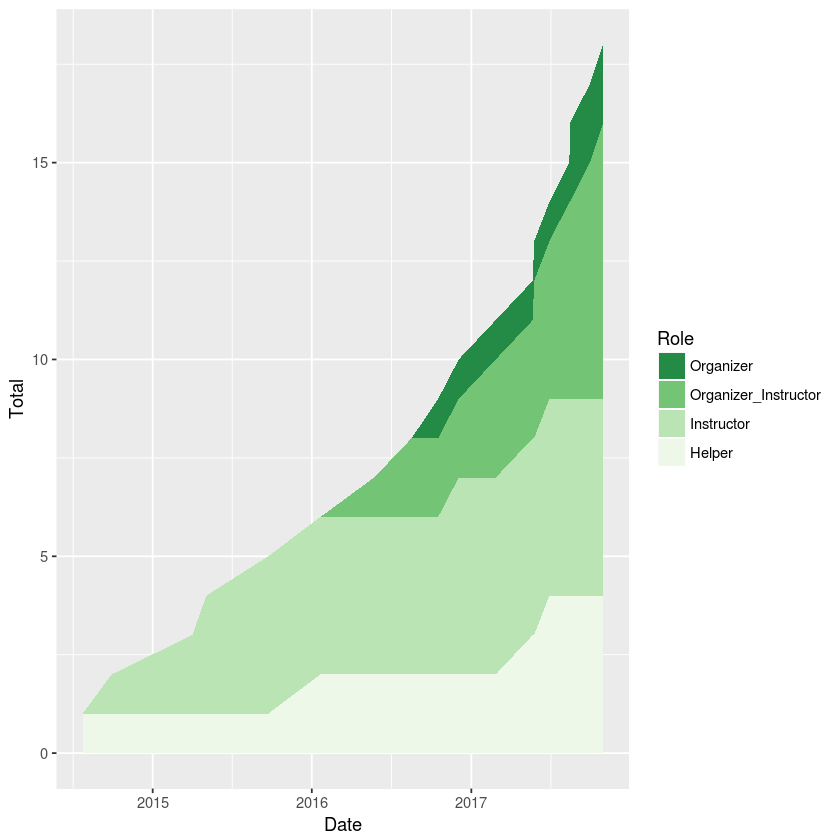

In [46]:
p <- ggplot(activity_long[order(activity_long$Role),], 
            aes(x = Date, y = Total, fill=Role)) + 
  geom_area() +
  scale_fill_brewer(palette="Greens", direction=-1)
print(p)